# Customer churn

#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result
10> save Model
11> reload model for prediction of test .csv
12>do data cleaning for test.csv
13> predict Fees

# Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('Telecom_customer_churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.shape

(7043, 21)

rows: 7043, data: 21

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
print("Number of Categories: ")
for ColName in data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories: 
customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6531
Churn = 2


Observation : Senior citizer, Tenure and Monthly charge are int value , other than that all are categorical

## Logistic Regression Kind of technique need to resolve this problem

Its Logistic , because churn is the target variale and it contains only 2 values

# EDA Process

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Encoding

In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [12]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [13]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [14]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


## Checking null value in dataset

In [15]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There are no null data

# Data Cleaning

## Skewness

In [16]:
data.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

There is very less skewness presnet in Senior Citizen, other than that, there is no skewness, so less first check outliers

## Outliers

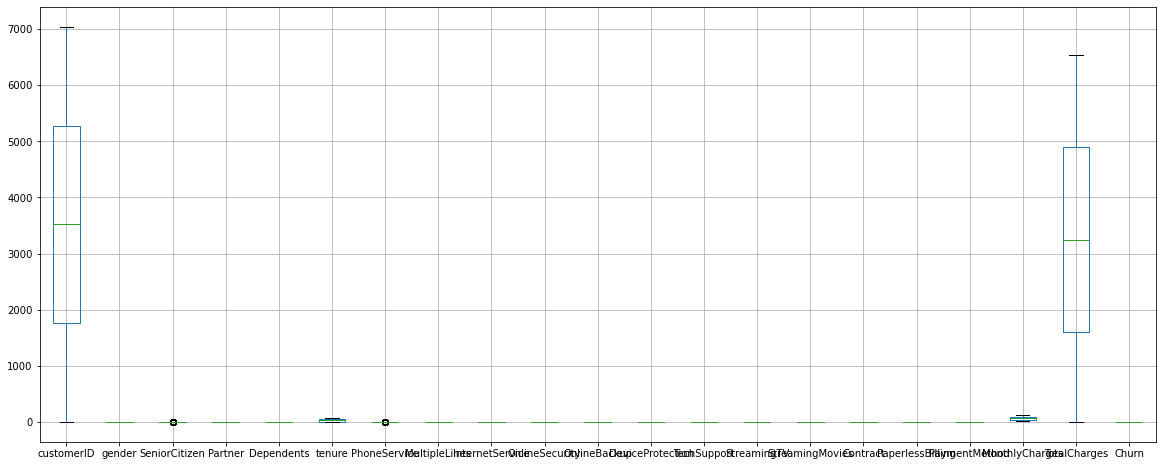

In [17]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.show()

#### There is outlier present in Senior citizer. If we dont remove it works but lets remove and try to improve the accuracy

# Corelation among feature variables and target variable(Churn)

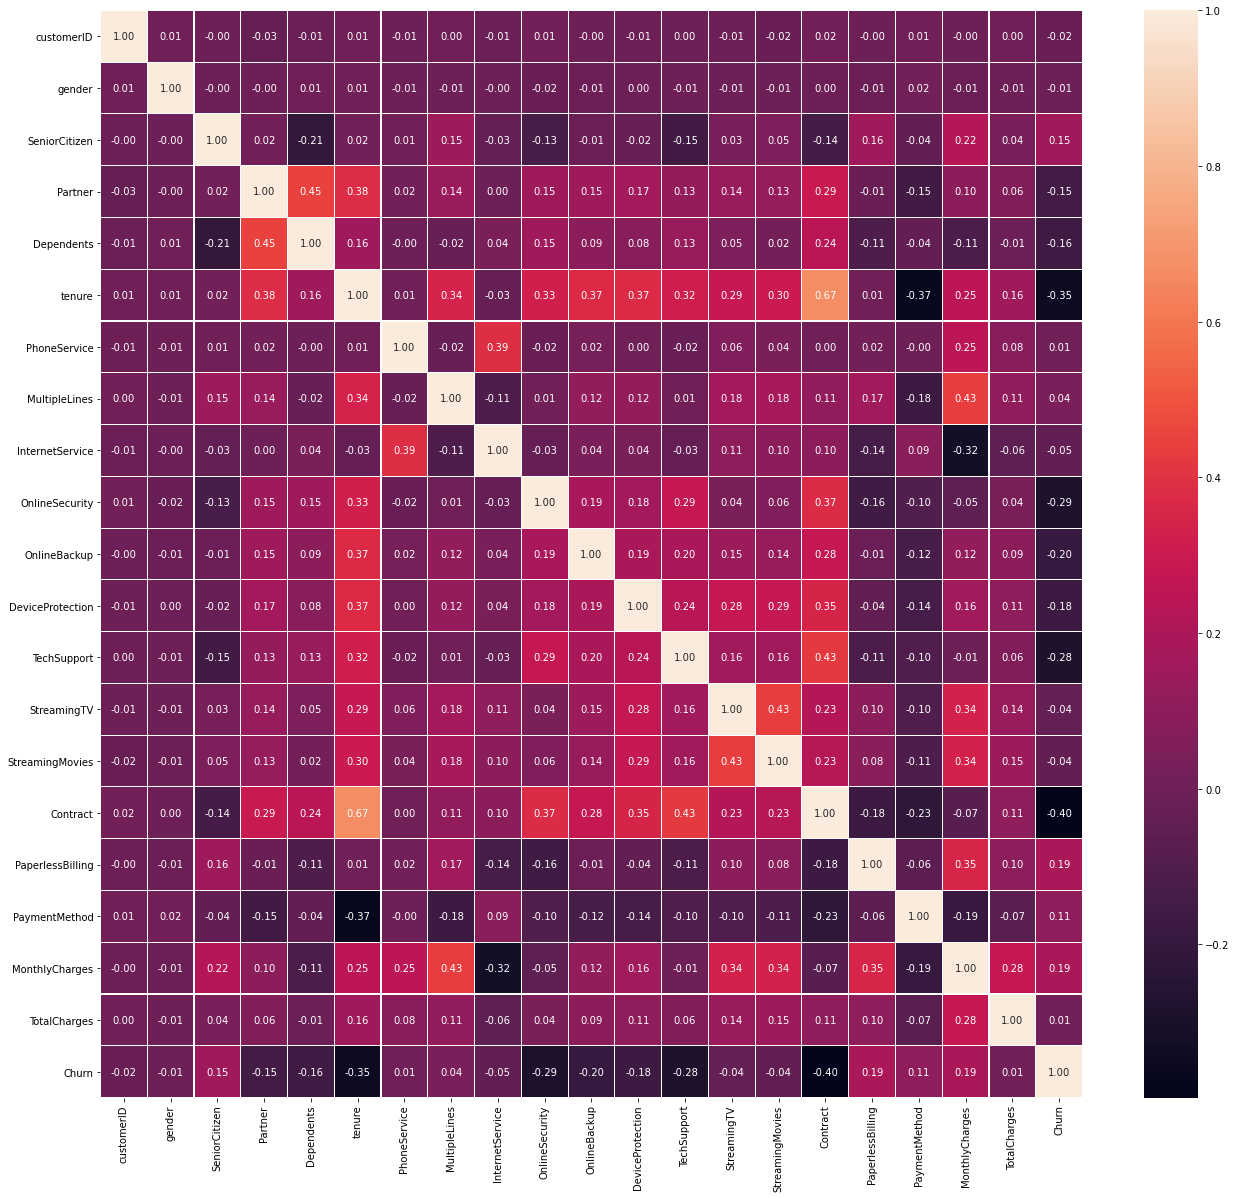

In [18]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [19]:
corr_matrix_hmap["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Most corelated feature with churn is monthly charges charged by the company

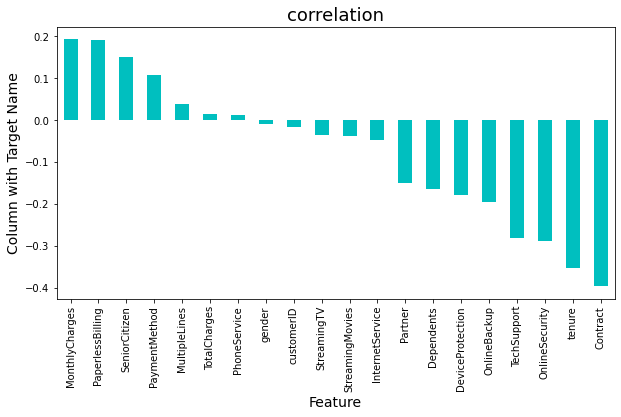

In [20]:
plt.figure(figsize=(10,5))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Maximum Corelated: Monthly charges charged to the client by company

Minimum Corelated: gender

Negatively Corelated:Contract, that is, longer the contract lesser the churn

# Handling Outliers and Skewness

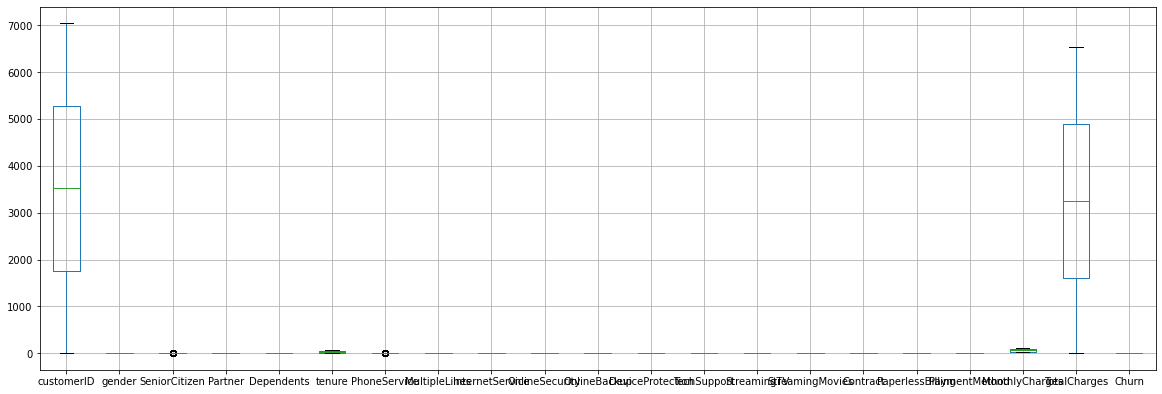

In [21]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [22]:
# # Removing Outliers
# from scipy.stats import zscore
# z= np.abs(zscore(data))
# z

In [23]:
# threshold = 3
# print(np.where(z<3))

In [24]:
# #removing outliers
# data_new = data[(z<3).all(axis=1)]

In [25]:
# data.shape

In [26]:
# #After removing outliers
# data_new.shape

In [27]:
# data=data_new
# data.shape

In [28]:
# data

### Commenting handling of outliers, beacuse even we are removing it the accuracy is not not changing, but if will remove outliers and skewness it may arise the LOSS of DATA

# Seperating Independent Variables and Target Variables

In [29]:
# x= independent variable
x = data.iloc[:,0:-1]
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0


In [30]:
#y = target variable = churn
y = data.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [31]:
x.shape

(7043, 20)

In [32]:
y.shape

(7043,)

In [33]:
x.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

### Rechecking skewness after removing outliers

In [34]:
# x.skew()

In [35]:
# x.dtypes

## Handling Skewness

In [36]:
# #Method for removing skew

# from sklearn.preprocessing import power_transform
# z = power_transform(x[0:])
# data_new= pd.DataFrame(z,columns=x.columns)

In [37]:
# x = data_new

In [ ]:
# #after removing skewness
# x.skew()

### Commenting handling of skeness, beacuse even we are removing it the accuracy is not not changing, but if will remove outliers and skewness it may arise the LOSS of DATA

# Visualization

In [39]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

0.0    5174
1.0    1869
Name: Churn, dtype: int64


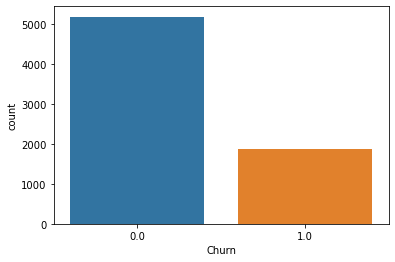

In [40]:
import seaborn as sns
alpha = sns.countplot(x="Churn",data=data)
print(data["Churn"].value_counts())

Churn which is our target variable contains 2 values, 0 and 1

In [41]:
df_visual= x[['SeniorCitizen', 'MonthlyCharges', 'tenure']].copy()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

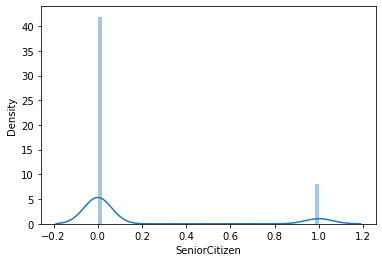

In [42]:
import seaborn as sns
sns.distplot(df_visual['SeniorCitizen'],kde=True)

Overfitting is present

In [43]:
x['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

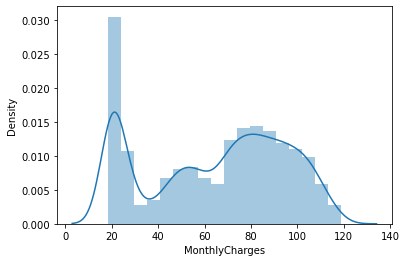

In [44]:
sns.distplot(df_visual['MonthlyCharges'],kde=True)

Overfitting is present

<AxesSubplot:xlabel='tenure', ylabel='Density'>

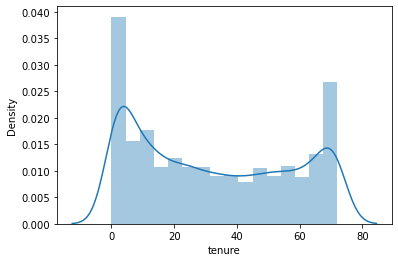

In [45]:
sns.distplot(df_visual['tenure'],kde=True)

Here also overfitting is presnt , we need to solve that

# Scaling

In [46]:
x.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000


In [47]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [48]:
x=mms.fit_transform(x)

In [49]:
x

array([[0.76327748, 0.        , 0.        , ..., 0.66666667, 0.11542289,
        0.38361409],
       [0.56262425, 1.        , 0.        , ..., 1.        , 0.38507463,
        0.2245023 ],
       [0.36410111, 1.        , 0.        , ..., 1.        , 0.35422886,
        0.02404288],
       ...,
       [0.47813121, 0.        , 0.        , ..., 0.66666667, 0.11293532,
        0.45849923],
       [0.84265834, 1.        , 1.        , ..., 1.        , 0.55870647,
        0.40735069],
       [0.31610338, 1.        , 0.        , ..., 0.        , 0.86965174,
        0.8280245 ]])

# Model Training

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)


In [51]:
x_train.shape

(4718, 20)

In [52]:
y_train.shape

(4718,)

In [53]:
x_test.shape

(2325, 20)

In [54]:
y_test.shape

(2325,)

In [55]:
y_train

298     0.0
3318    1.0
5586    0.0
6654    1.0
5362    0.0
       ... 
3772    1.0
5191    0.0
5226    0.0
5390    1.0
860     0.0
Name: Churn, Length: 4718, dtype: float64

In [56]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [57]:
lm.fit(x_train,y_train)

LogisticRegression()

In [58]:
lm.score(x_train,y_train)

0.801398897838067

## Prediction

In [59]:
#predict the values
pred=lm.predict(x_test)
print("Predicted Allitation",pred)
print("Actual Allitation",y_test)

Predicted Allitation [1. 0. 0. ... 1. 1. 0.]
Actual Allitation 185     1.0
2715    0.0
3825    0.0
1807    1.0
132     0.0
       ... 
4147    0.0
3542    0.0
3759    1.0
1114    0.0
4958    0.0
Name: Churn, Length: 2325, dtype: float64


In [60]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.8129032258064516


# Finding Best Ransom State

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc =accuracy_score(y_test,predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  0.824516129032258 on Random_state 129


# Train- Test Model based on Ransom state

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 129)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))

Accuracy Score: 0.824516129032258
Confusion Matrix: [[1595  143]
 [ 265  322]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1738
         1.0       0.69      0.55      0.61       587

    accuracy                           0.82      2325
   macro avg       0.78      0.73      0.75      2325
weighted avg       0.82      0.82      0.82      2325



In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.7316129032258064
Confusion Matrix: [[1400  338]
 [ 286  301]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1738
         1.0       0.47      0.51      0.49       587

    accuracy                           0.73      2325
   macro avg       0.65      0.66      0.65      2325
weighted avg       0.74      0.73      0.74      2325



In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predrfc))
print('Confusion Matrix:', confusion_matrix(y_test,predrfc))
print('Classification Report:', classification_report(y_test,predrfc))

Accuracy Score: 0.8081720430107527
Confusion Matrix: [[1592  146]
 [ 300  287]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1738
         1.0       0.66      0.49      0.56       587

    accuracy                           0.81      2325
   macro avg       0.75      0.70      0.72      2325
weighted avg       0.80      0.81      0.80      2325



In [67]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predsvm))
print('Confusion Matrix:', confusion_matrix(y_test,predsvm))
print('Classification Report:', classification_report(y_test,predsvm))

Accuracy Score: 0.8141935483870968
Confusion Matrix: [[1615  123]
 [ 309  278]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      1738
         1.0       0.69      0.47      0.56       587

    accuracy                           0.81      2325
   macro avg       0.77      0.70      0.72      2325
weighted avg       0.80      0.81      0.80      2325



In [68]:


pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0


from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")

        
        
    print("\n")
    
        
    
    
 
    

At cross fold 2 cv score is 0.8006527235548339 and accuracy score training is 0.794616362865621 and accuracy for the testing is 0.824516129032258


At cross fold 3 cv score is 0.8032090938762909 and accuracy score training is 0.794616362865621 and accuracy for the testing is 0.824516129032258


At cross fold 4 cv score is 0.8016484854937793 and accuracy score training is 0.794616362865621 and accuracy for the testing is 0.824516129032258


At cross fold 5 cv score is 0.8040625604877734 and accuracy score training is 0.794616362865621 and accuracy for the testing is 0.824516129032258


At cross fold 6 cv score is 0.8009382505193273 and accuracy score training is 0.794616362865621 and accuracy for the testing is 0.824516129032258


At cross fold 7 cv score is 0.8053398998828705 and accuracy score training is 0.794616362865621 and accuracy for the testing is 0.824516129032258


At cross fold 8 cv score is 0.8029255559281807 and accuracy score training is 0.794616362865621 and accuracy for

In [69]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Logistic Regression",cv_mean)

Cross validation score for Logistic Regression 0.80434877285306


In [70]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Decision Tree",cv_mean)

Cross validation score for Decision Tree 0.7253976319012839


In [71]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Random Forest Classifier",cv_mean)

Cross validation score for Random Forest Classifier 0.7980970527302698


In [72]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svm,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Support Vector Machhine",cv_mean)

Cross validation score for Support Vector Machhine 0.797961559981249


### Least the diffrence between Accuracy and cross validation, Best the model

#### Decision Tree shows max accuracy

%Accuracyscore = accuracy - crossvalidation

# Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [74]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [76]:
EN = ElasticNet(alpha=0.001,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)

lss= accuracy_score(y_test,pred_test)
lss

0.824516129032258

In [77]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.264997187773674

# Ensemble Technique

In [78]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),'criterion':["gini","entrophy"]}

rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'gini', 'max_depth': 5}


In [79]:
rf=DecisionTreeClassifier(criterion="gini",max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)

#print(clf.best_params_)

Accuracy Score: 80.3010752688172
Cross Validation Score: 79.04326488805728


# Saving Model

In [80]:
import pickle
filename = "customer_churn.pkl"
pickle.dump(rf,open(filename,"wb"))


# Loading Model

In [81]:
loaded_model=pickle.load(open('customer_churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.803010752688172


In [82]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324
Predicted,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Original,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Our model shows 80% accuracy, which predicts the status of loan